<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter2ForwardModels/SpectralAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging
### David J. Brady
### University of Arizona

## Spectral Analysis

This notebook supports ideas developed in section 2.7 of *Computational Optical Imaging*. Specifically we consider spectral analysis of discrete forward models.

#### initialization code

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy import integrate
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
#plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
from google.colab import files
#!apt install texlive-fonts-recommended texlive-fonts-extra



The structure of forward models can be analyzed using spectral analysis. An $m\times n$ matrix $\mathbf{H}$ can be decomposed using singular value analysis into the for
$$
\mathbf{H}={\mathbf U\Lambda V'}
$$
where $\mathbf{U}$ is an $m\times m$ unitary matrix, $\mathbf{V}$ is an $n\times n$ unitary matrix and $\Lambda $ is a diagonal matrix. Here we look at the singular values and singular vectors for various example matrices.

## circulant matrices

shift invariant linear transformations are common in imaging systems. These transformations can be modeled in discrete form using circulant or Toeplitz matrices. Consider for example a 1 dimensional system with discrete impulse response integrating [1 1 1 1 1 1 1 1] on a sampling range of 512 input pixels. This forward model takes the form shown below

### 1 1 1 1 1 1 1 1 1

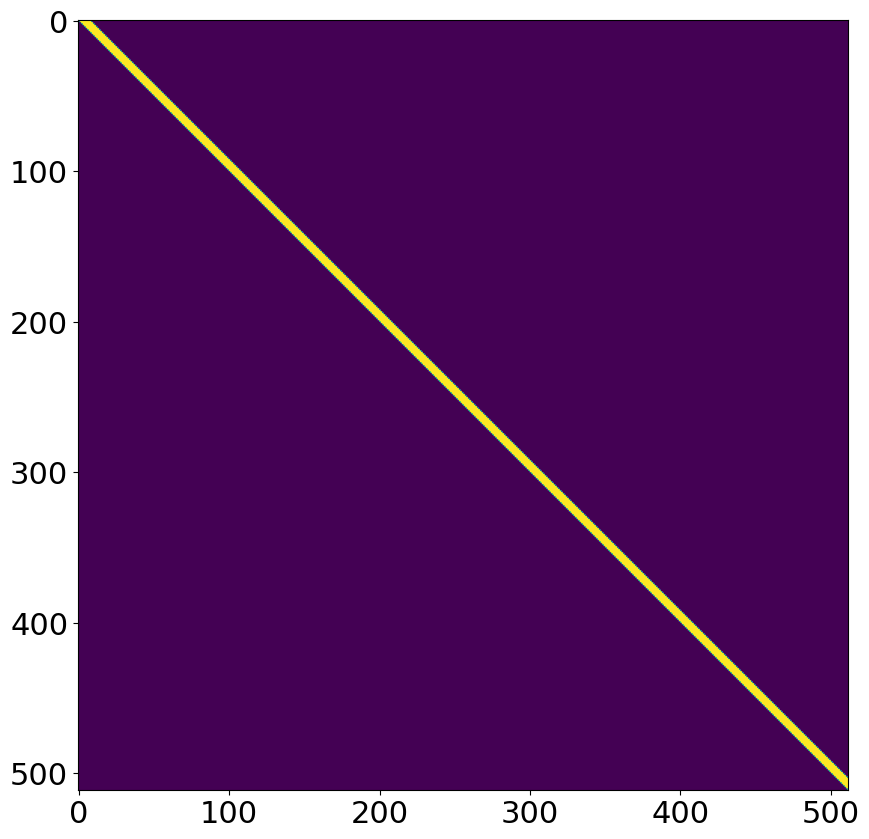

In [ ]:
#
from scipy.linalg import toeplitz
psf=[1,1,1,1,1,1,1,1]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

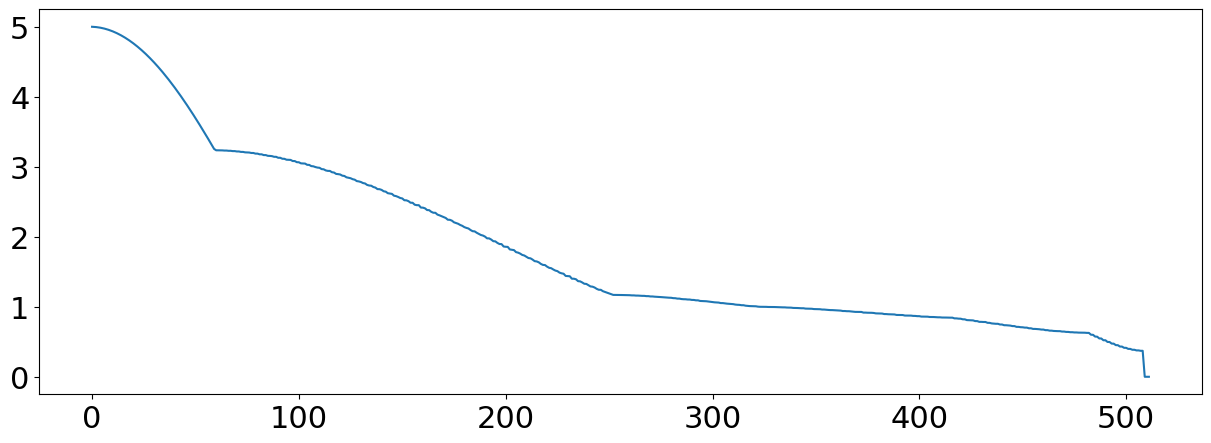

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(s)
plt.savefig('rectSpectrum.png')
files.download('rectSpectrum.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

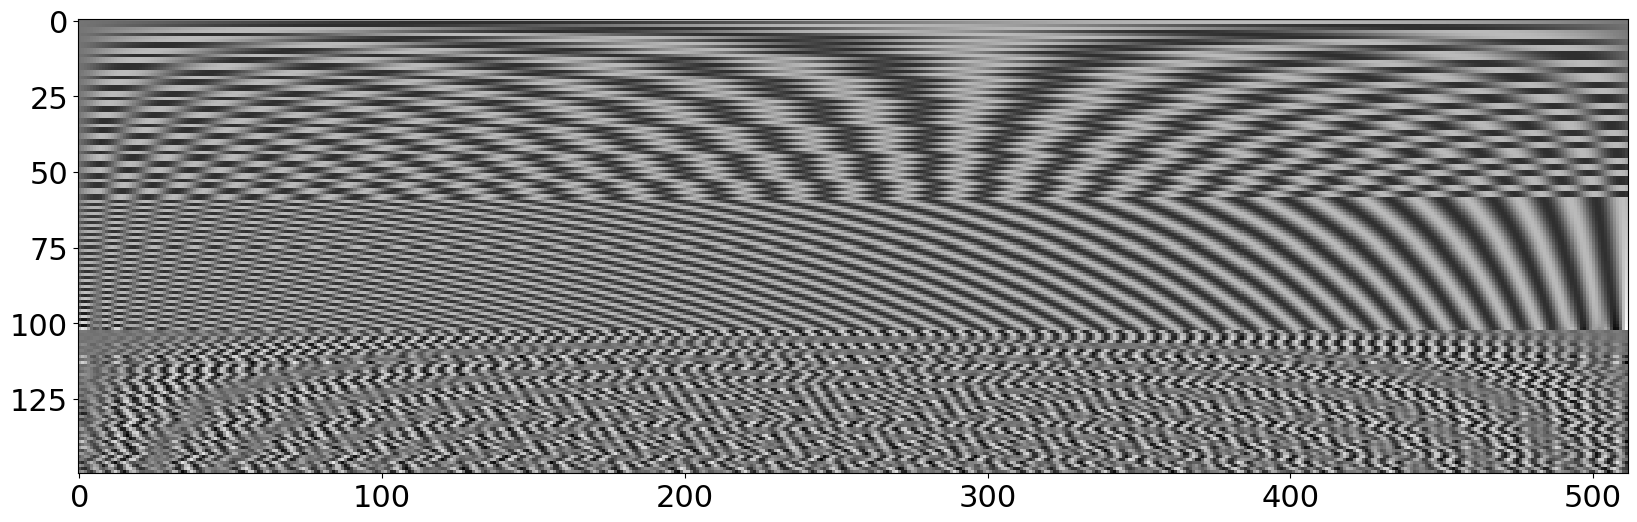

In [ ]:
plt.imshow(vh[0:150,:],cmap='gray')
plt.savefig('rectVectors.png')
files.download('rectVectors.png')


### 1 0 1 1 0 1 1 0 1

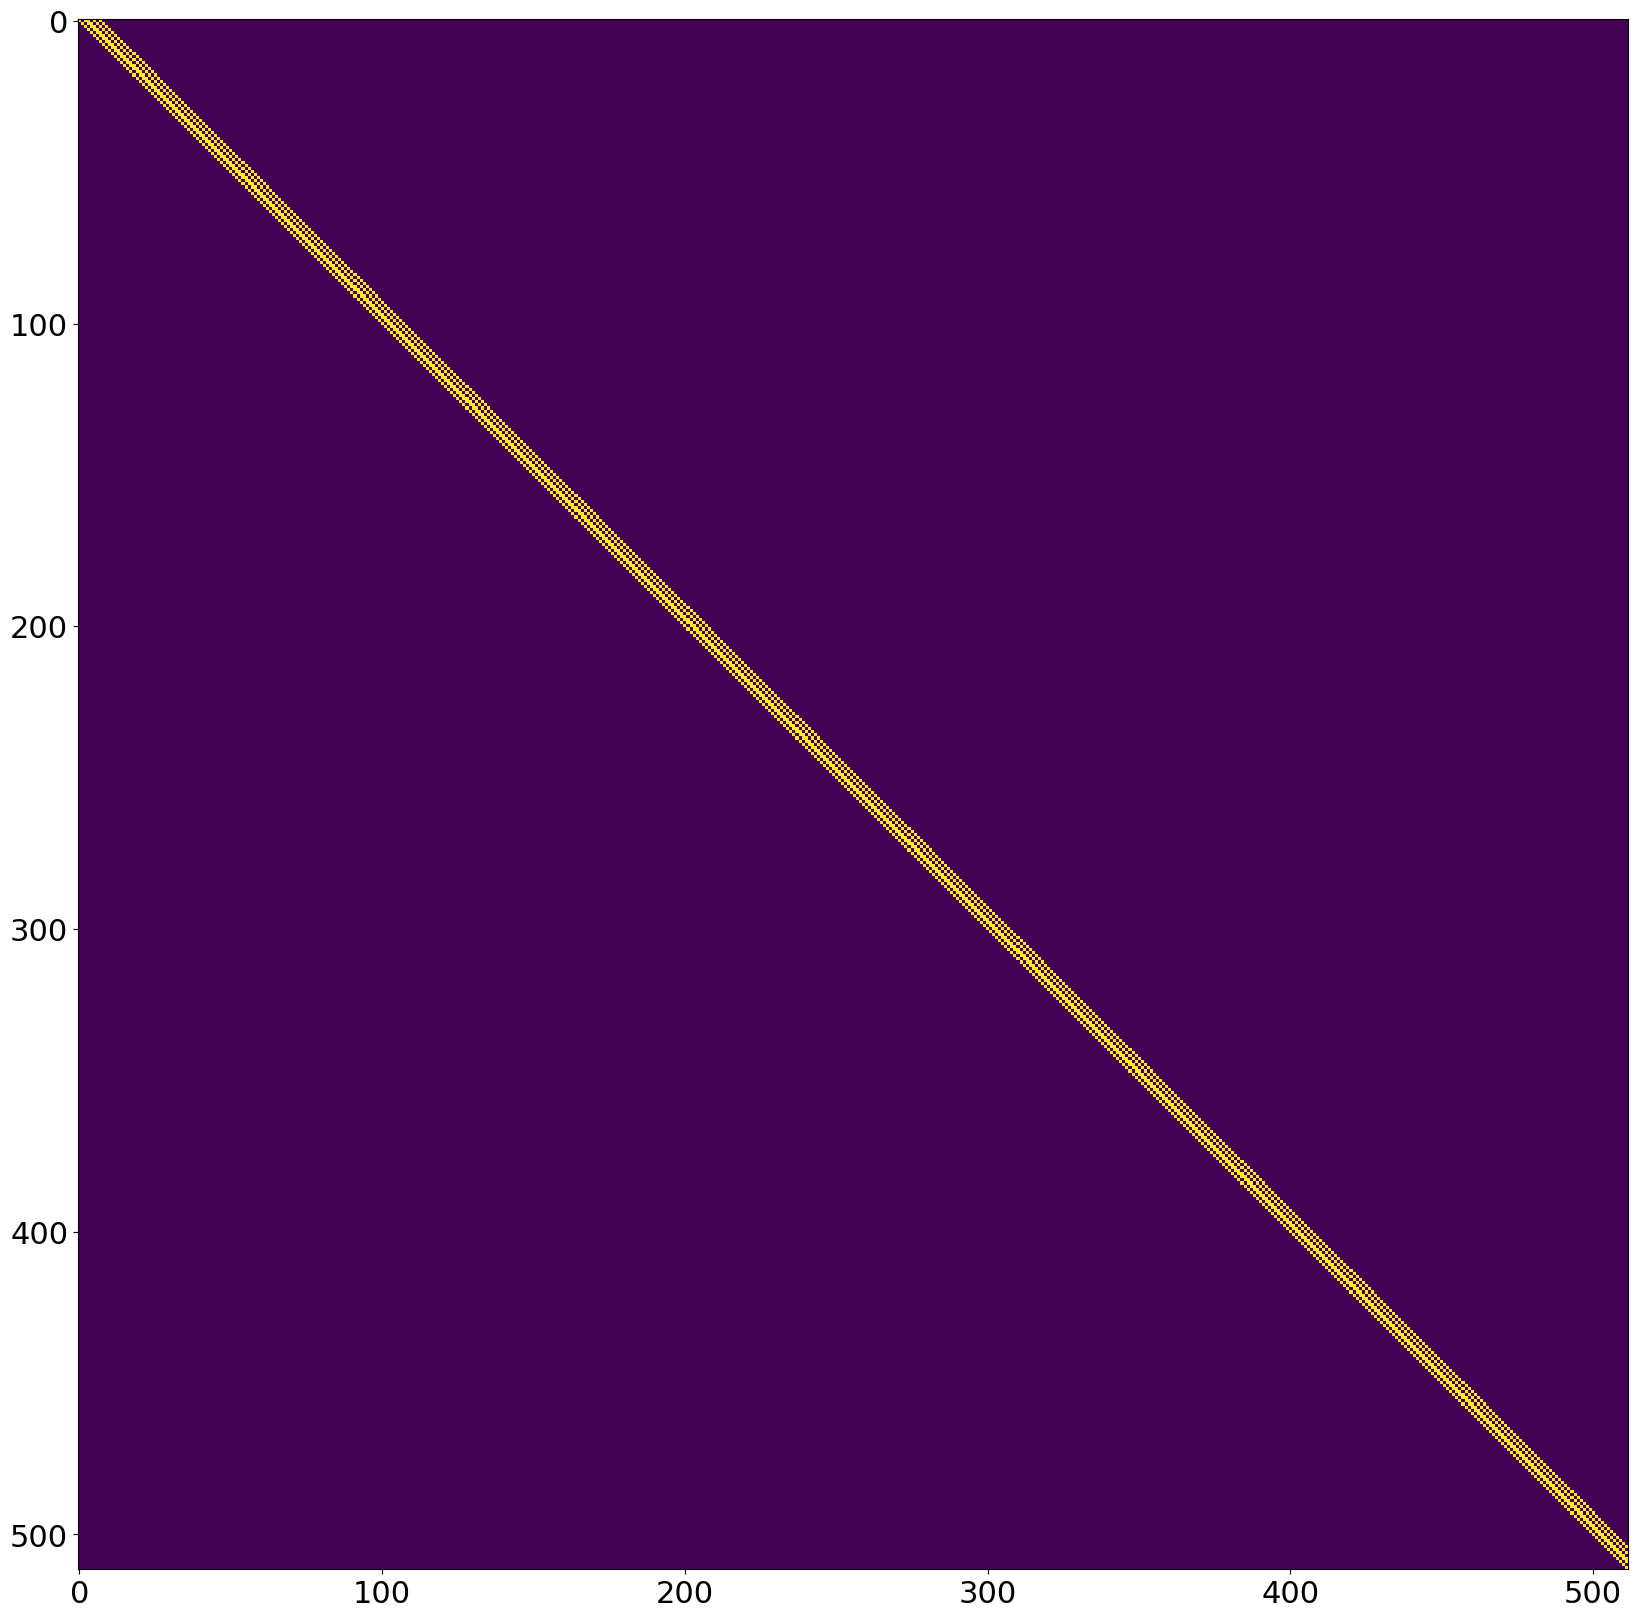

In [ ]:
#
from scipy.linalg import toeplitz
psf=[1,0,1,1,0,1,0,1]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

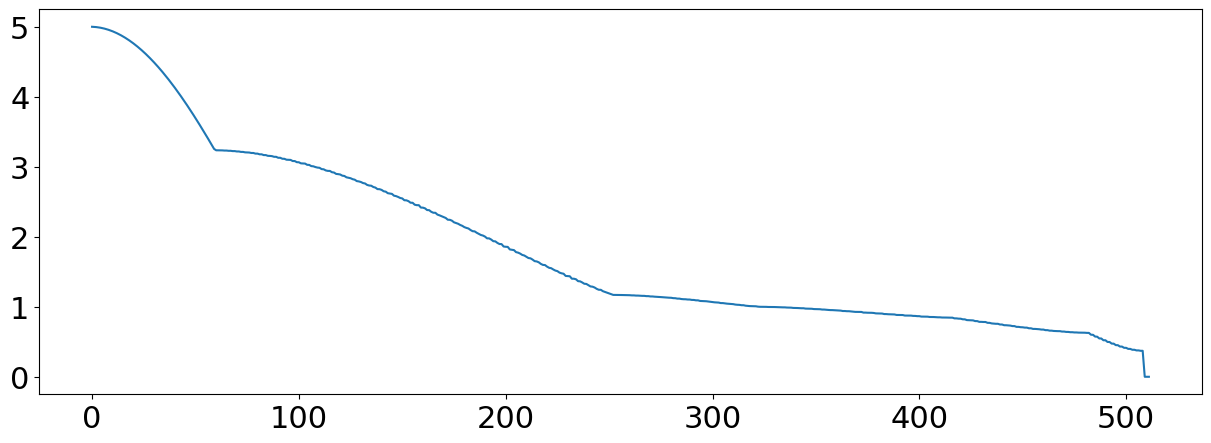

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(s)
plt.savefig('modSpectrum.png')
files.download('modSpectrum.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

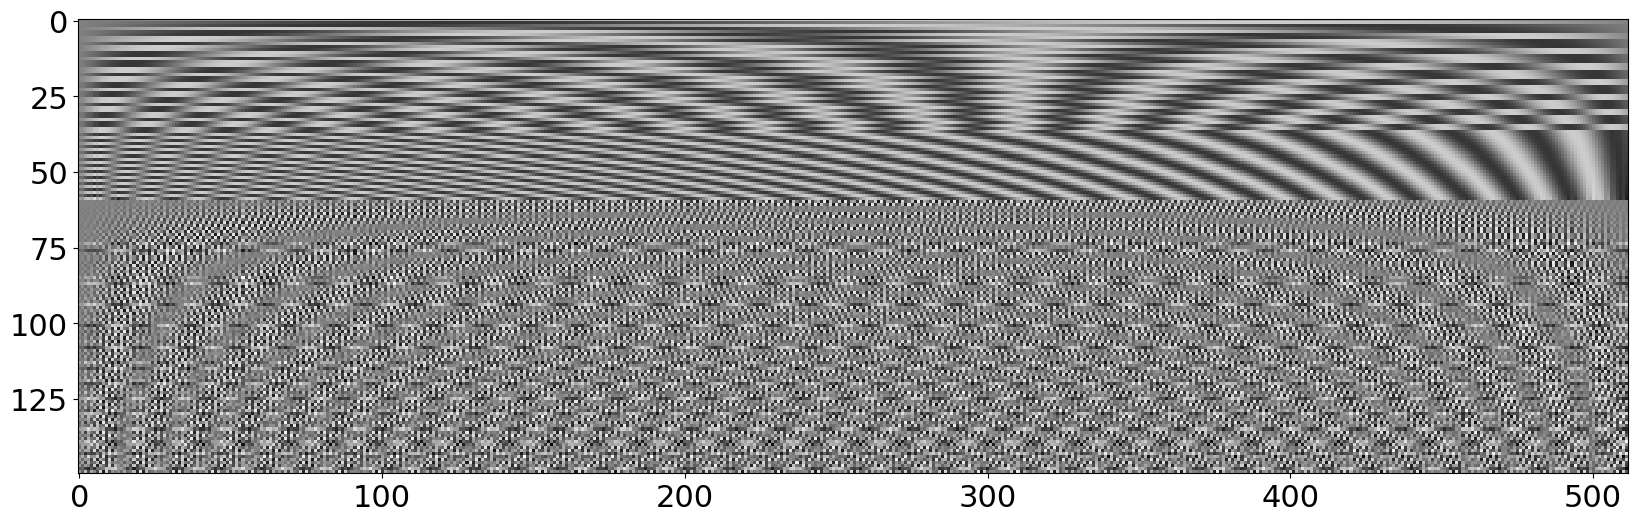

In [ ]:
plt.imshow(vh[0:150,:],cmap='gray')
plt.savefig('modVectors.png')
files.download('modVectors.png')


### 1 -1 1 1 -1 1 1 -1 1

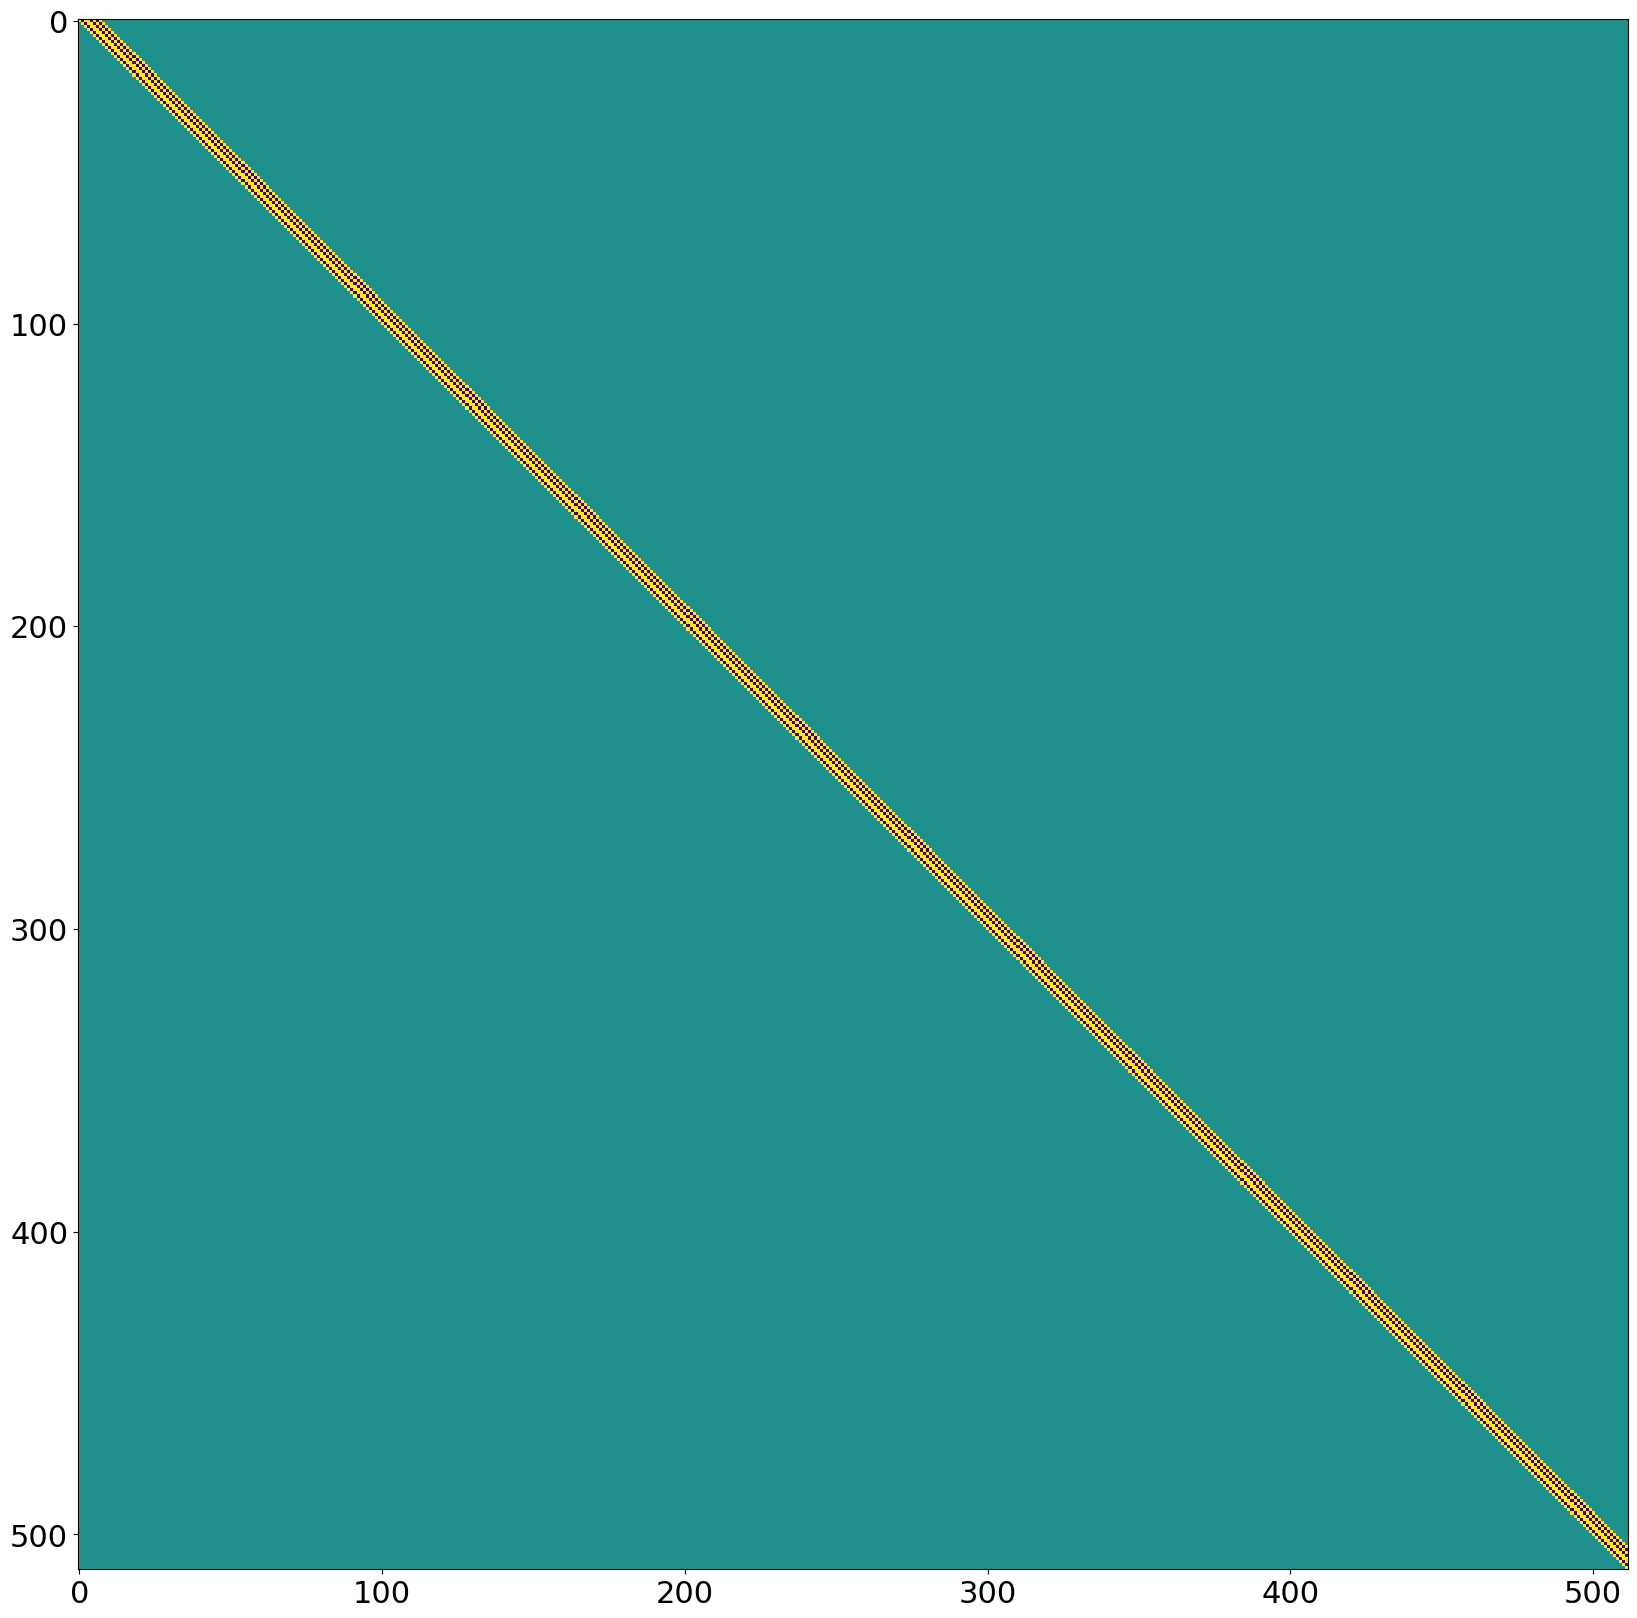

In [ ]:
#
from scipy.linalg import toeplitz
psf=[1,-1,1,1,-1,1,-1,1]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

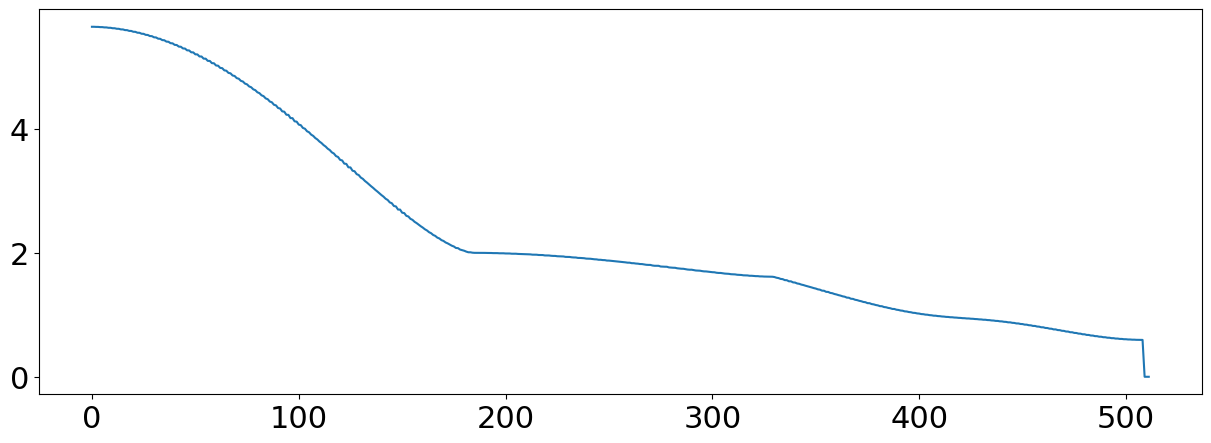

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(s)
plt.savefig('bipolarSpectrum.png')
files.download('bipolarSpectrum.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

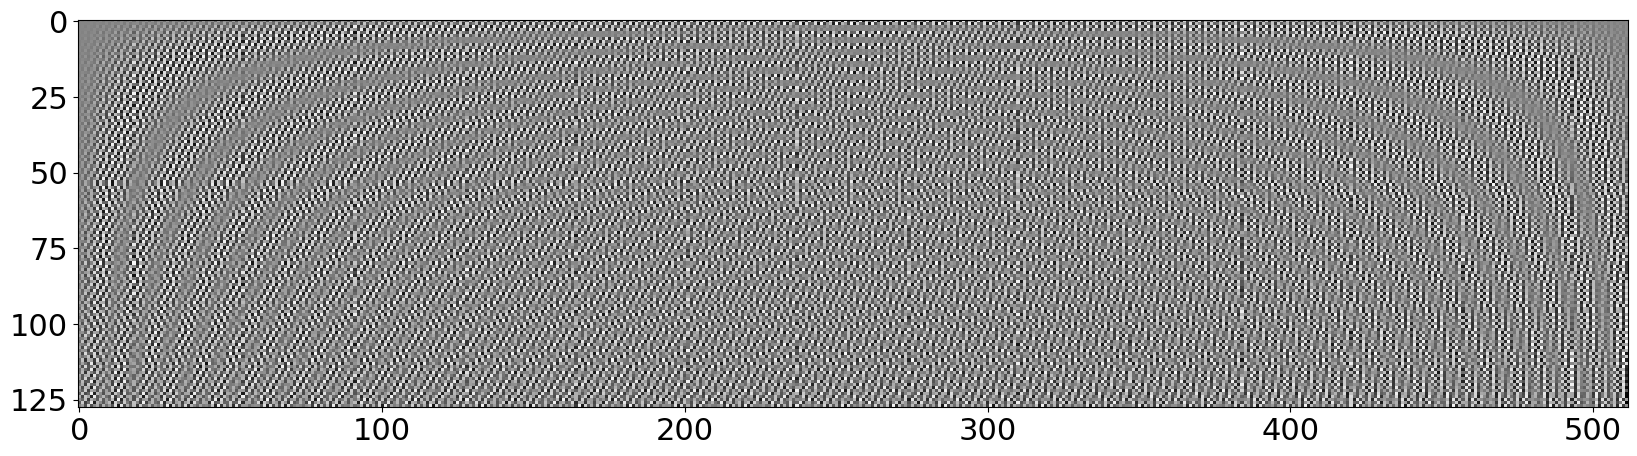

In [ ]:
plt.imshow(vh[0:128,:],cmap='gray')
plt.savefig('bipolarVectors.png')
files.download('bipolarVectors.png')

### Random unipolar

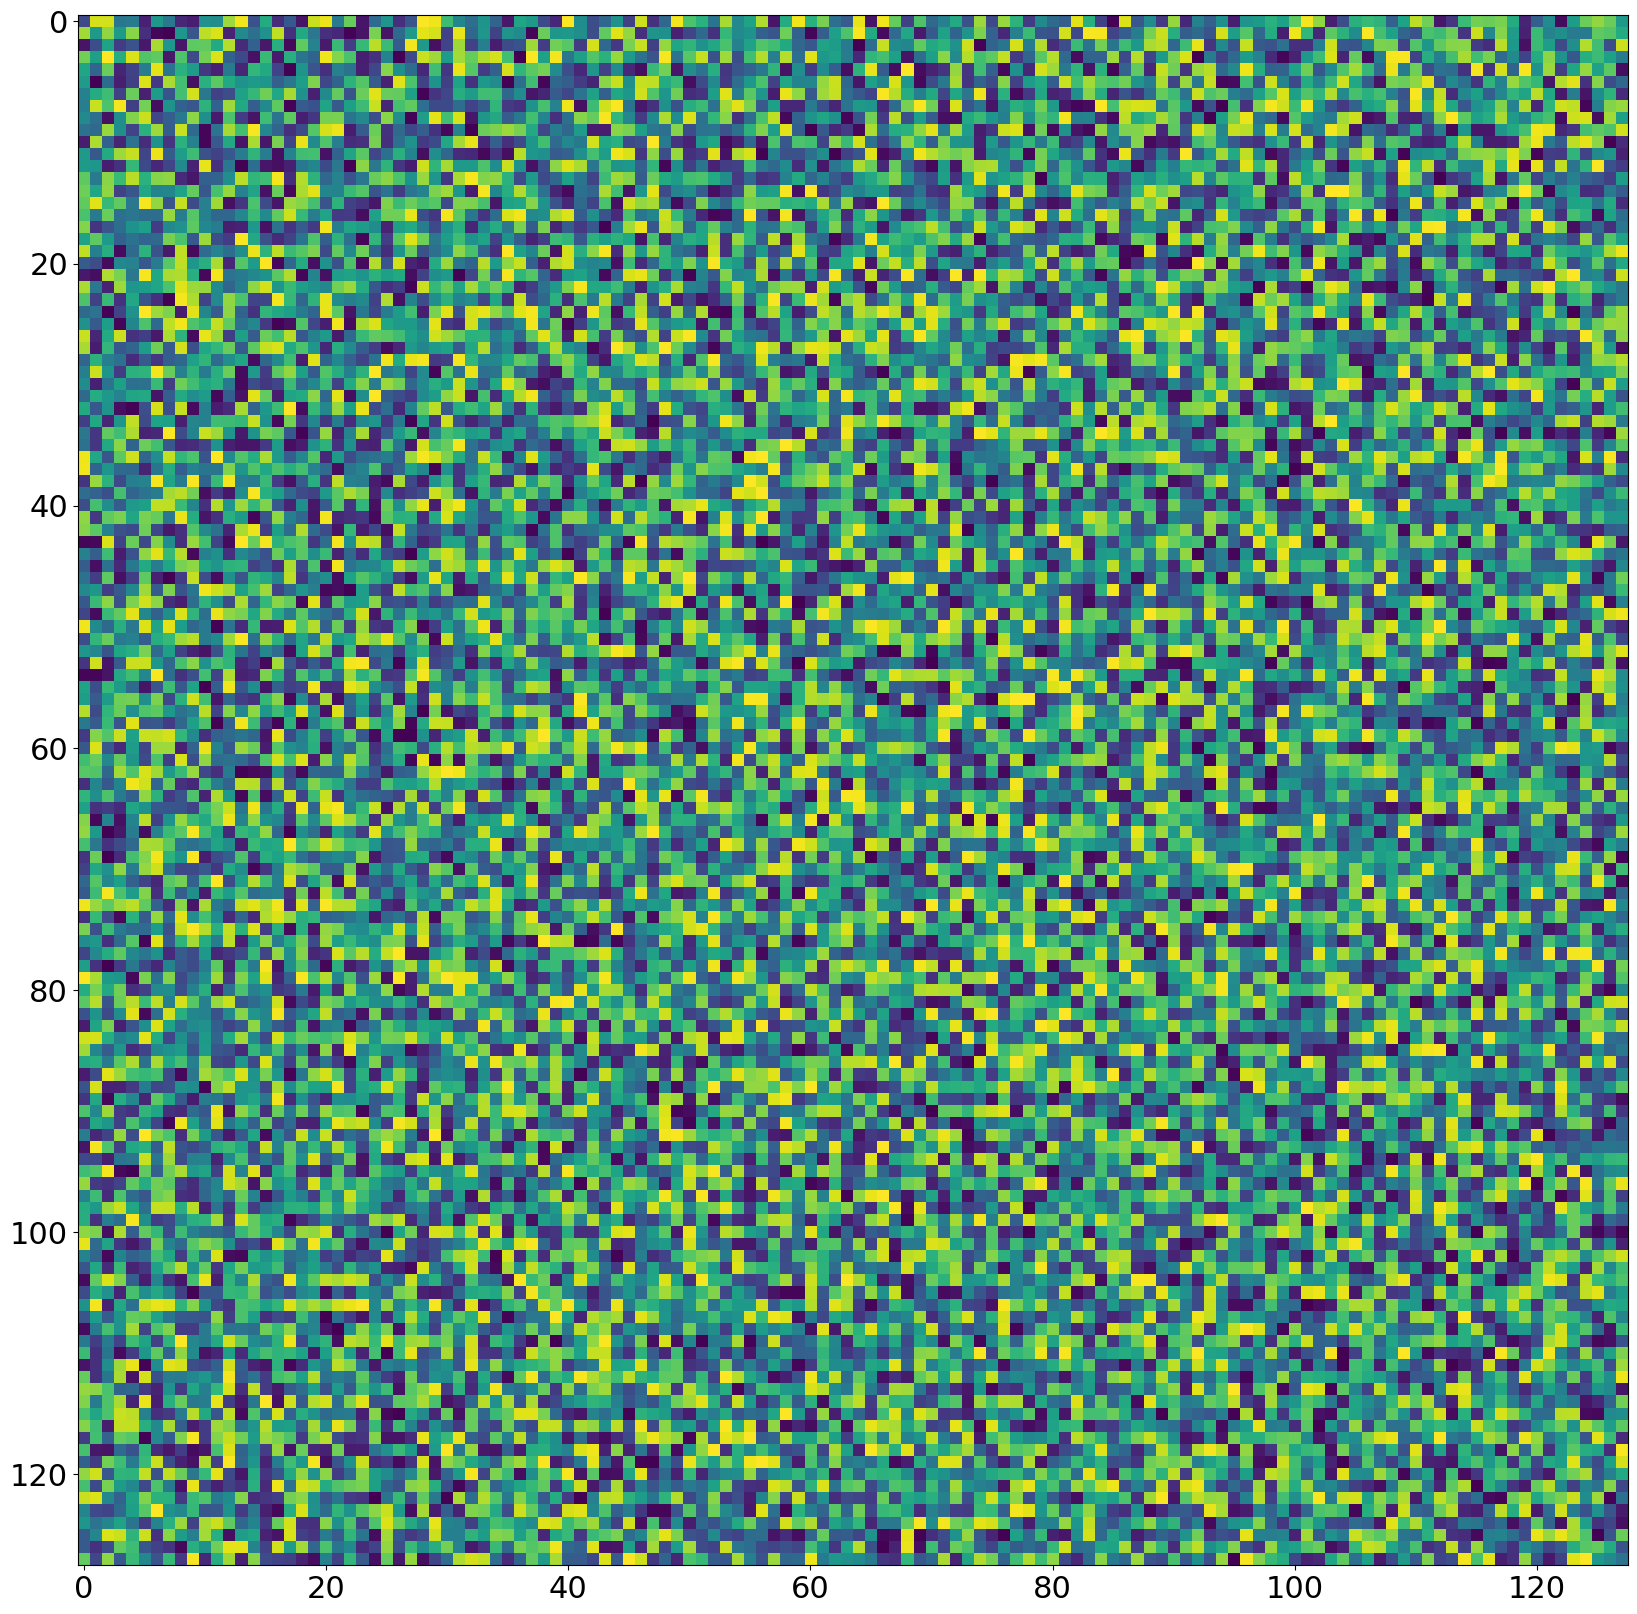

In [ ]:
#
from scipy.linalg import toeplitz
H=np.random.random((128,128))
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

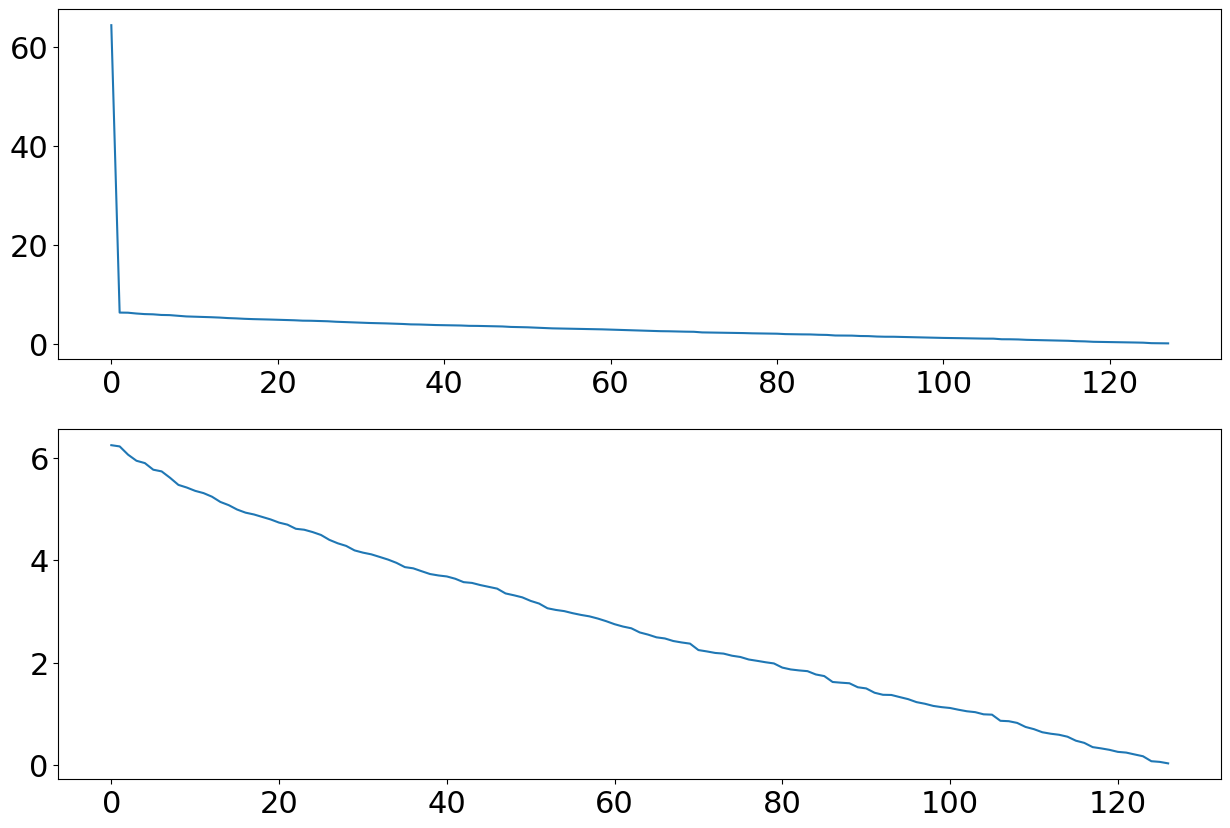

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(s)
plt.subplot(2,1,2)
plt.plot(s[1:])
plt.savefig('randomSpectrum.png')
files.download('randomSpectrum.png')

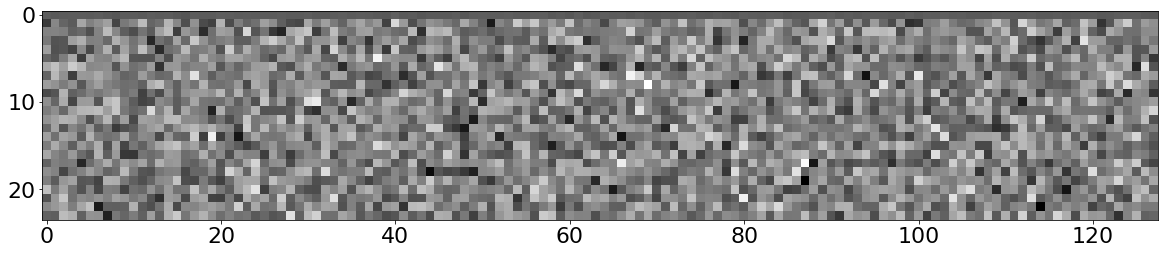

In [ ]:
plt.imshow(vh[0:24,:],cmap='gray')


### Random bipolar

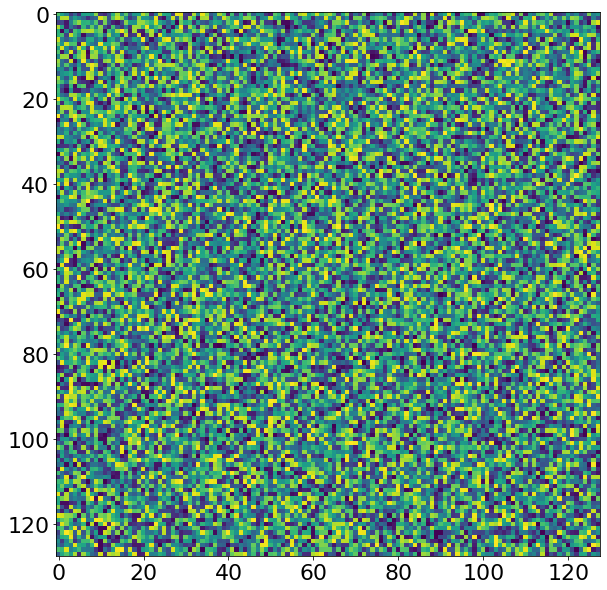

In [ ]:
#
from scipy.linalg import toeplitz
H=np.random.random((128,128))-.5
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




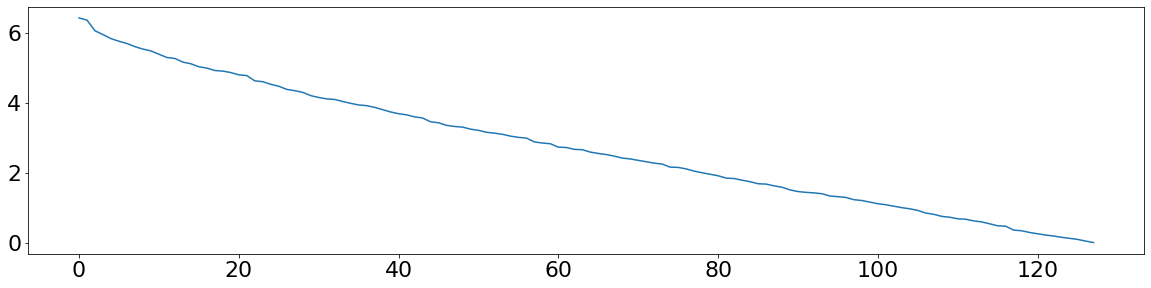

In [ ]:
plt.subplot(2,1,1)
plt.plot(s)

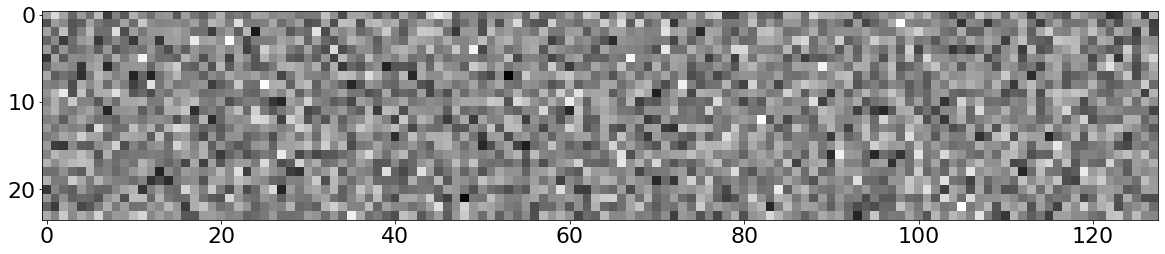

In [ ]:
plt.imshow(vh[0:24,:],cmap='gray')


### sinc

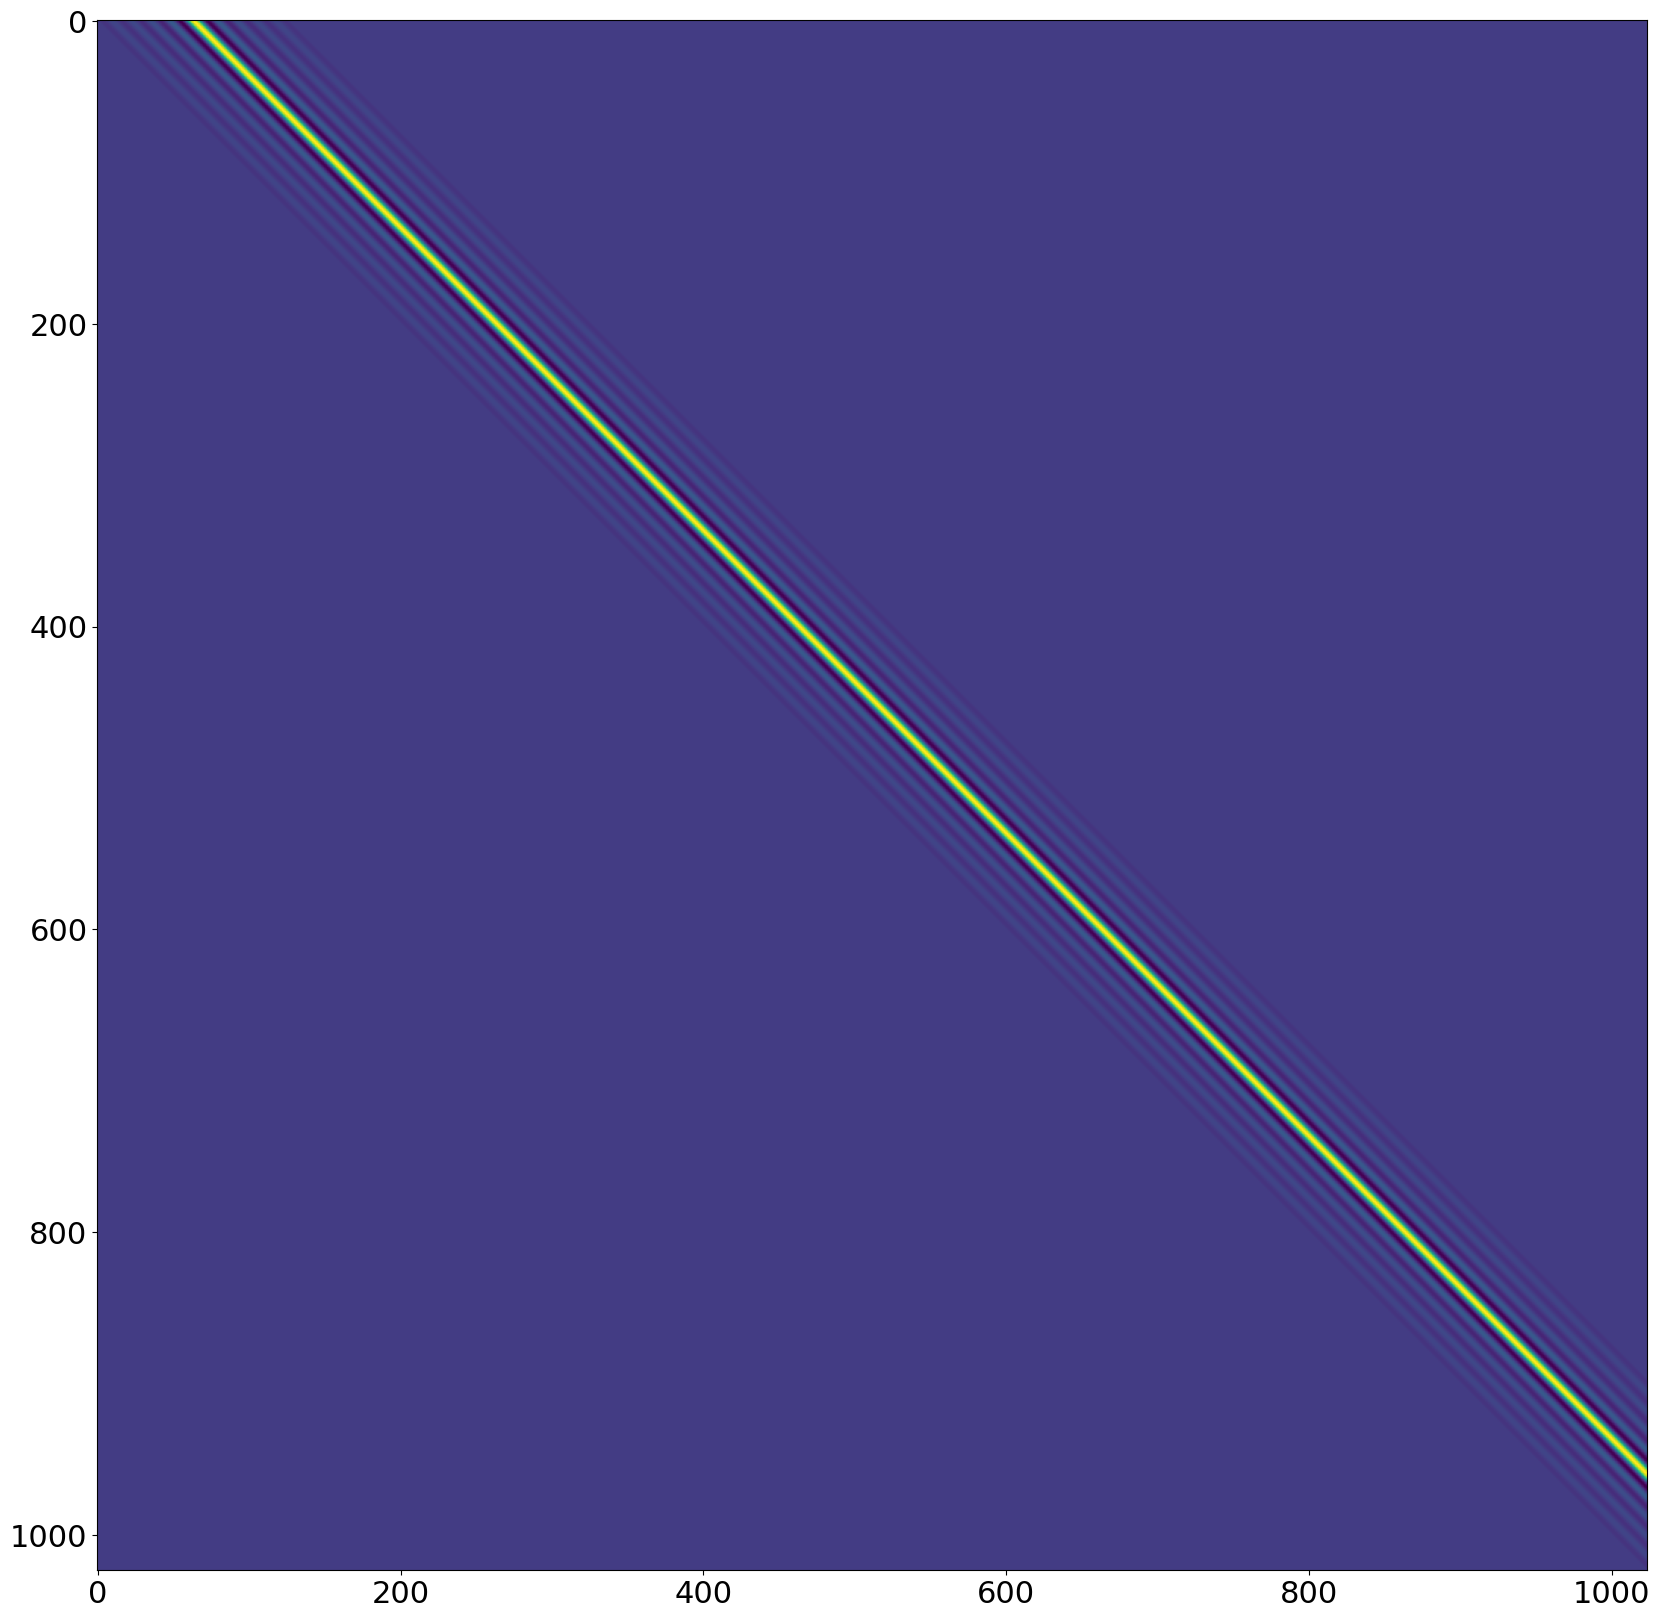

In [ ]:
#
from scipy.linalg import toeplitz
psf=np.sinc(np.linspace(-10,10,128))
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

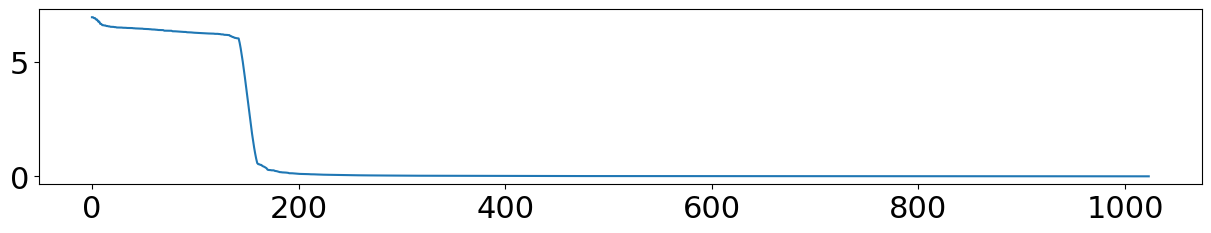

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(s)
plt.savefig('sincSpectrum.png')
files.download('sincSpectrum.png')

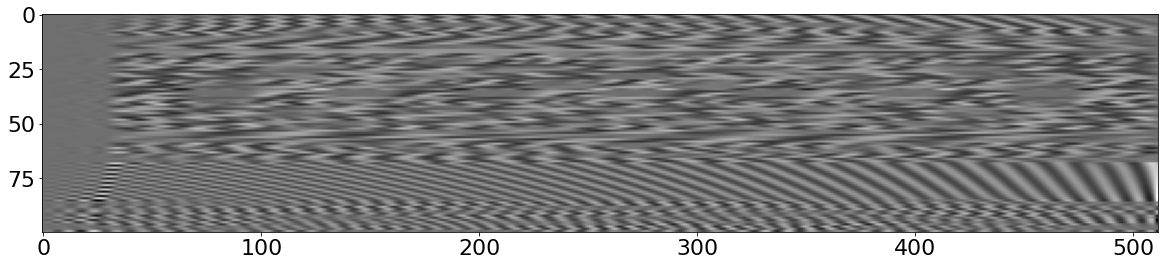

In [ ]:
plt.imshow(vh[0:100,:],cmap='gray')


### sinc$^2$

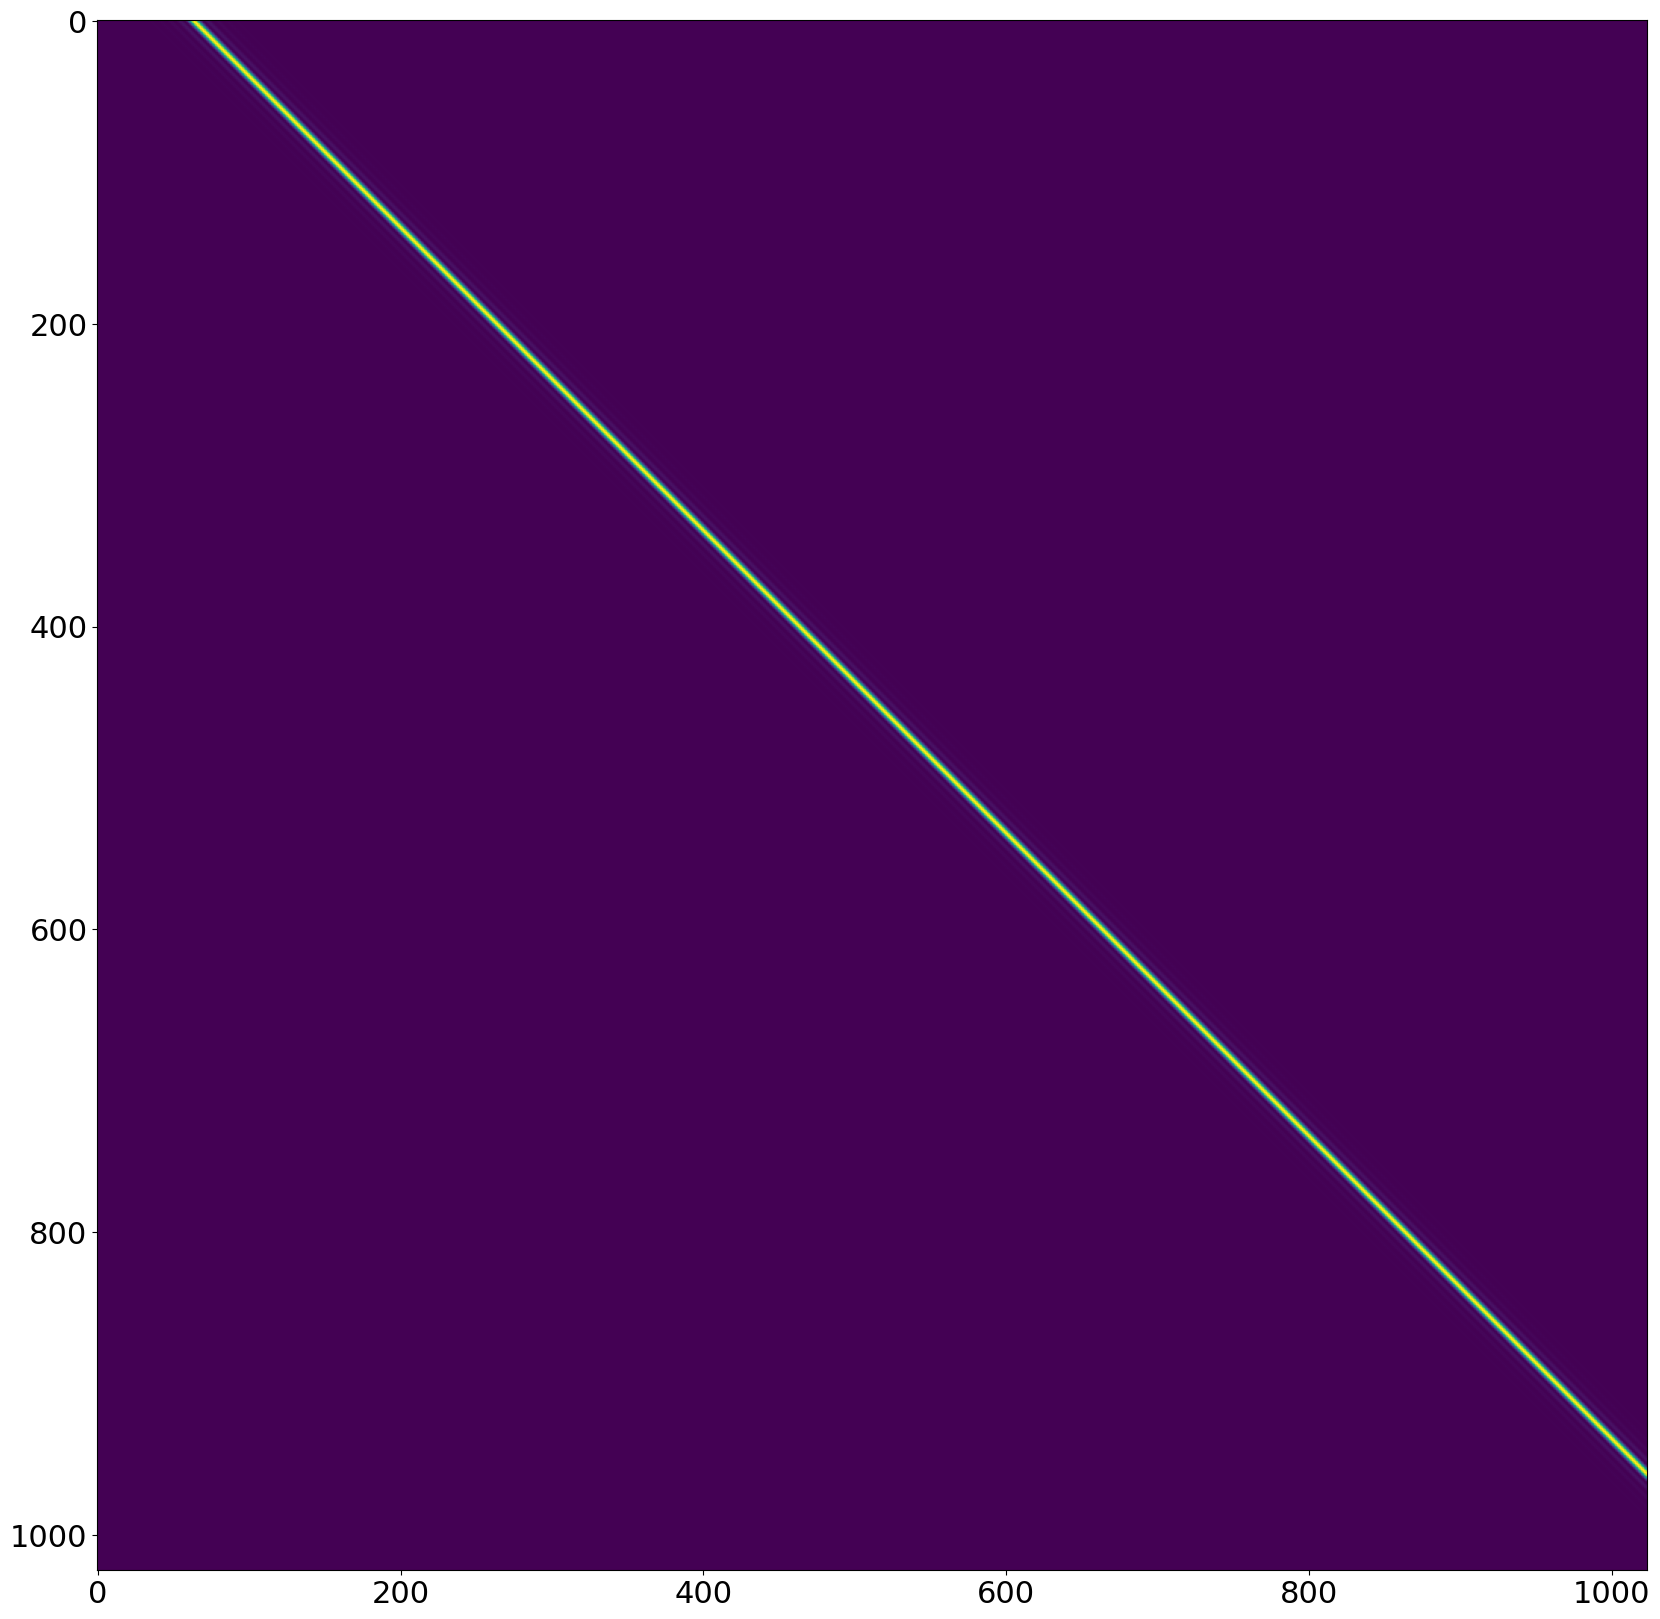

In [ ]:
#
from scipy.linalg import toeplitz
psf=np.abs(np.sinc(np.linspace(-10,10,128)))**2
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

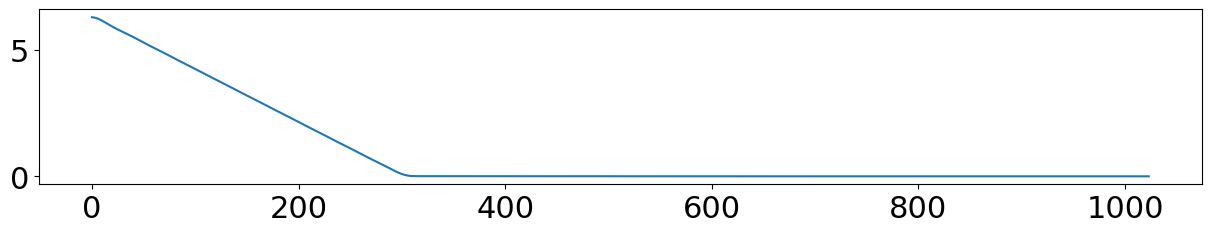

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(s)
plt.savefig('sinc2Spectrum.png')
files.download('sinc2Spectrum.png')

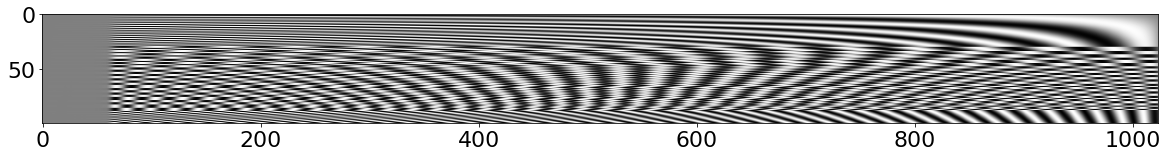

In [ ]:
plt.imshow(vh[0:100,:],cmap='gray')
